# Counting spells in Harry Potter books
I want to discover two things.
- Which book is the most spell intensive?
- What is the most common spell in each of the Harry Potter books?

In [1]:
import pandas as pd
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Files
I am working with two datasets:
- The seven Harry Potter books in .txt format
- A list of spells in .csv format

In [2]:
# Reading in the list of books
books = glob.glob(r'.\books\*.txt')

In [3]:
# Putting the books into a dataframe
contents = [open(book,encoding='Latin5').read() for book in books]
books_df = pd.DataFrame({
    'book': books,
    'body': contents,
})
books_df

,body,book
0,/ \n\n\n\n\nTHE BOY WHO LIVED \n\nMr. and Mrs....,.\books\Book 1 - The Philosopher's Stone_djvu.txt
1,\nJ . K . R O W L ! N G \n\nHARRY \n\nPOTTER \...,.\books\Book 2 - The Chamber of Secrets_djvu.txt
2,/ \n\n\n\n\nOWL POST \n\nHarry Potter was a hi...,.\books\Book 3 - The Prisoner of Azkaban_djvu.txt
3,/ \n\n\n\n\nTHE RIDDLE HOUSE \n\nThe villagers...,.\books\Book 4 - The Goblet of Fire_djvu.txt
4,HARRY \n\nPOTTER \n\n\n\n\nI \n\n\n\n\nDUDLEY ...,.\books\Book 5 - The Order of the Phoenix_djvu...
5,\n* J \n\n\n\n/ \n\n\n\n\nTHE OTHER MINISTER \...,.\books\Book 6 - The Half Blood Prince_djvu.txt
6,I \n\n\n\n* \n\nTHE DARK LORD ASCENDING \n\nTh...,.\books\Book 7 - The Deathly Hallows_djvu.txt


In [4]:
# Reading in the list of spells
spells = pd.read_csv('spells.csv')['spell'].tolist()

### 1. What is the most spell-intensive book?
I'll use the vectorizers to count how many spells, in percentage of all the words, are in each book

In [5]:
# This counts ALL the words, relative numbers
#vectorizer = TfidfVectorizer(use_idf=False, norm='l1',stop_words='english')
#matrix = vectorizer.fit_transform(books_df['body'])
#matrix

In [7]:
# This counts ALL the words, absolute numbers
vectorizer = CountVectorizer(stop_words='english')
matrix = vectorizer.fit_transform(books_df['body'])
matrix

<7x23637 sparse matrix of type '<class 'numpy.int64'>'
	with 68227 stored elements in Compressed Sparse Row format>

In [8]:
# And this creates a grid out of it.
# NOTE: the (number)harry words came from page enumeration strings.
results = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
results.head()

,01,10,100,1002harry,1003harry,1004harry,1005harry,1006harry,1007harry,1008harry,...,zograf,zombie,zone,zonko,zonkoâ,zoo,zoological,zoom,zoomed,zooming
0,0,2,1,0,0,0,0,0,0,0,...,0,2,0,0,0,7,0,1,1,2
1,0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,2,0
2,0,2,1,0,0,0,0,0,0,0,...,0,1,0,2,9,0,0,0,9,3
3,0,2,1,0,0,0,0,0,0,0,...,2,0,0,0,1,0,1,4,9,12
4,0,2,0,1,1,1,1,1,1,1,...,0,0,1,0,3,0,0,2,23,7


In [9]:
# But I want to look ONLY at the spells.
# This recquires some handling, though. I want to look just at the spells that appear in the books - there are some more in the list.
# Also, if a spell is composed of more than two words, I'll look just at the first one. e.g 'Avada Kedavra' will be AVADA.
spells = [spell.split()[0] for spell in spells]

In [10]:
# Make the list into a dataframe so I can filter only the spells that appear in the book
spells_df = pd.DataFrame({
    'spell': spells,
})
spells_df.head()

,spell
0,Accio
1,Aguamenti
2,Alohomora
3,Aparecium
4,Avada


In [11]:
# Keeping only the spells that appear in the book - and in the books_df headers, this way
spells_df = spells_df[spells_df['spell'].str.lower().isin(list(results.columns.values))]

In [12]:
# Making everything lowercase in order to compare
spells_df['spell'] = spells_df['spell'].str.lower()

In [13]:
# And getting only the magic words!
results_spells = results[spells_df['spell'].tolist()]

In [14]:
# What is the total % of magic words
results_spells['magic_%'] = results_spells.sum(axis=1)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [15]:
# What is the most spell-intenstive book?
results_spells['magic_%'].sort_values(ascending=False)

6    148
4    132
5    102
3    100
2     73
1     23
0     21
Name: magic_%, dtype: int64

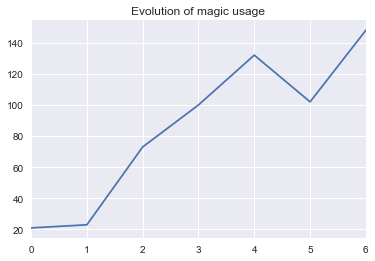

In [16]:
# Let's plot a line chart and see the trend.
ax = results_spells['magic_%'].plot()
ax.set_title("Evolution of magic usage")
plt.savefig('magic-usage.png')

The last book in the series is the most spell-intensive, followed by the third one! Most interestingly, there is a huge increase in the last three installments of the series.

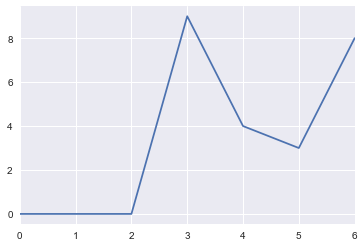

In [17]:
# FUN FACT: As Avada Kedavra is the wizarding-world equivalent of a gunshot, we can say that Harry Potter and The Golbet of Fire was the most violent book in the series, proportionally.
results_spells['avada'].plot()

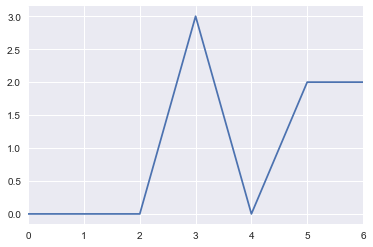

In [18]:
# And it was also the most SADISTIC one, with abuse of the torture spell.
results_spells['crucio'].plot()

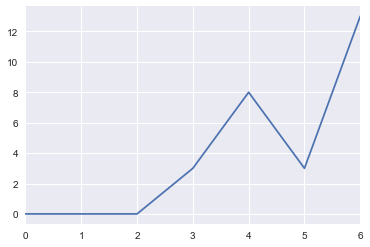

In [19]:
# And as the series progressed, people got lazy - 'accio' is a spell that finds and brings things to the hands of the wizard.
results_spells['accio'].plot()

In [20]:
results_spells

,accio,aguamenti,alohomora,aparecium,avada,avis,colloportus,confringo,confundus,conjunctivitis,...,riddikulus,salvio,scourgify,sectumsempra,silencio,sonorus,stupefy,tergeo,wingardium,magic_%
0,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,21
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,73
3,3,0,0,0,9,1,0,0,1,1,...,0,0,0,0,0,1,8,0,0,100
4,8,0,4,0,4,0,2,0,0,0,...,3,0,1,0,1,0,7,0,1,132
5,3,5,1,0,3,0,0,0,0,0,...,0,0,0,5,0,0,1,0,0,102
6,13,2,1,0,8,0,0,1,1,0,...,0,2,0,1,0,0,2,2,2,148


In [21]:
# Making index match book order
results_spells.index = [1,2,3,4,5,6,7]

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


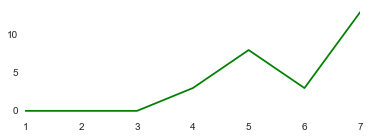

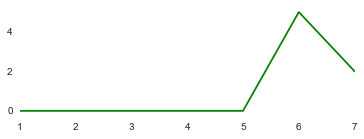

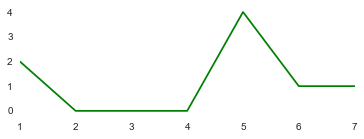

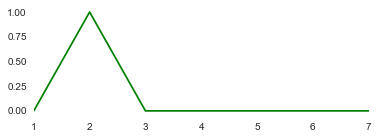

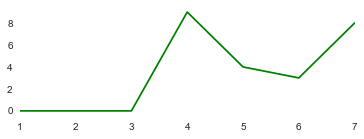

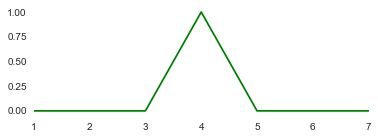

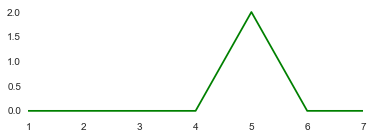

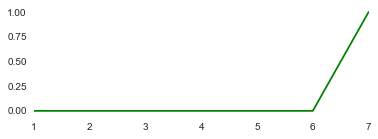

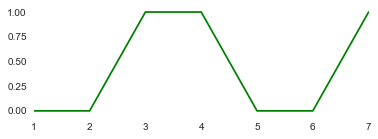

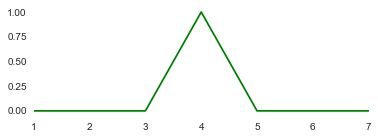

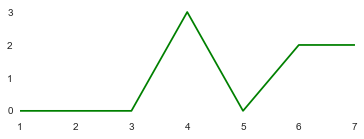

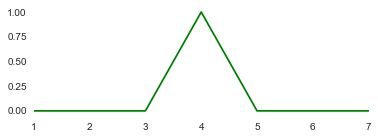

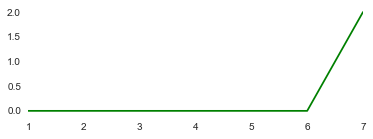

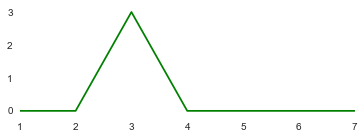

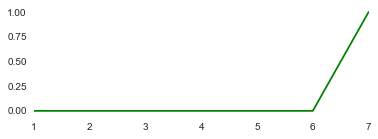

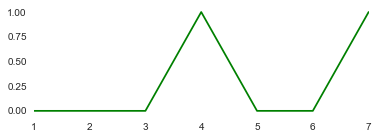

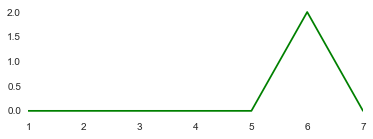

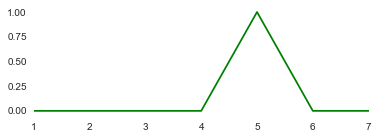

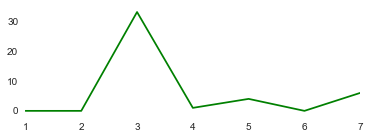

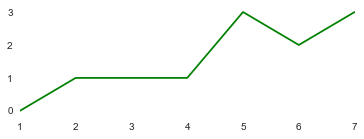

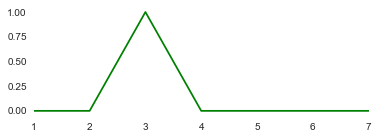

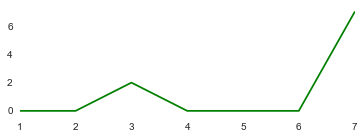

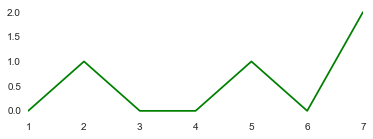

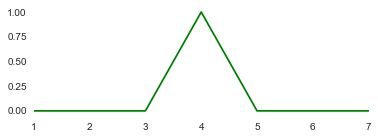

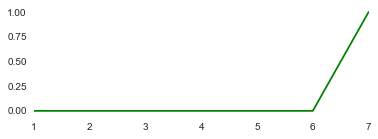

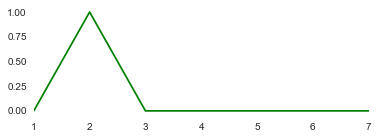

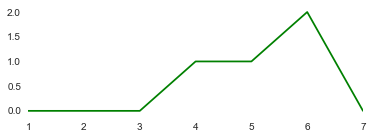

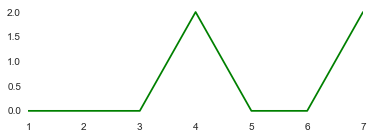

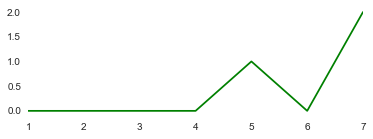

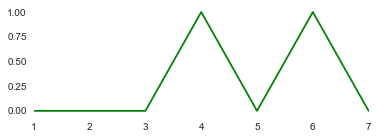

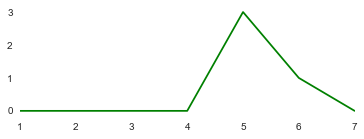

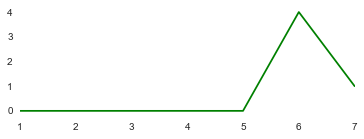

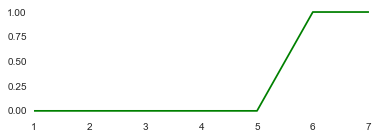

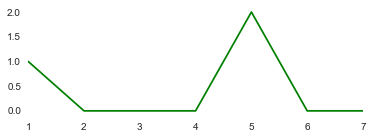

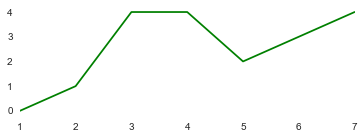

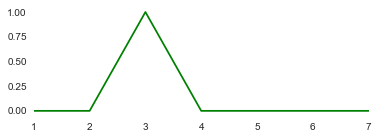

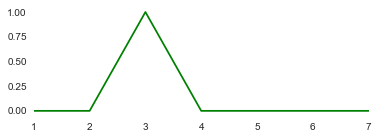

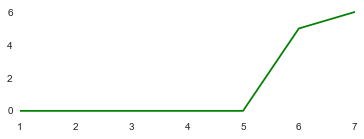

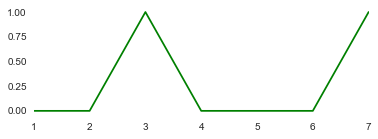

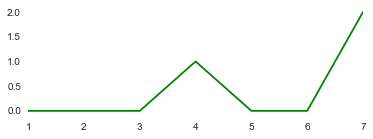

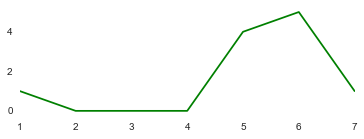

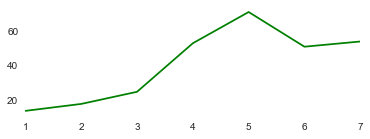

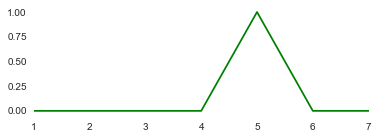

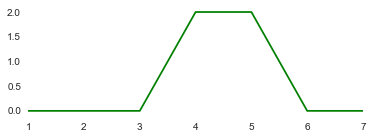

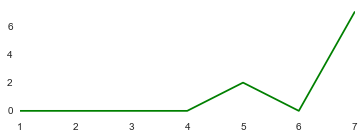

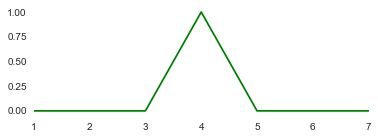

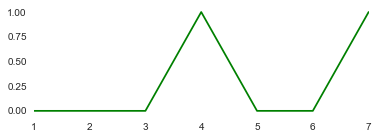

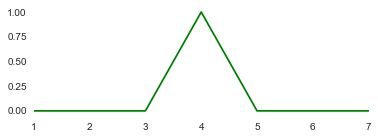

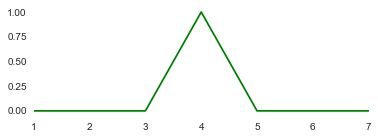

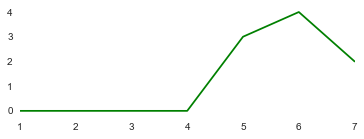

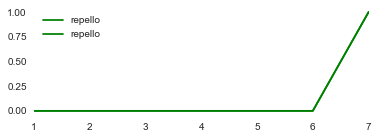

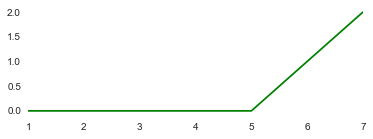

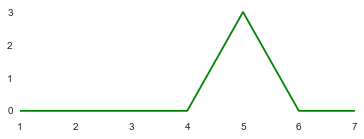

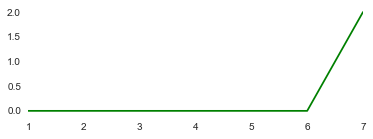

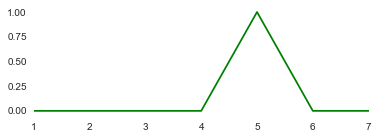

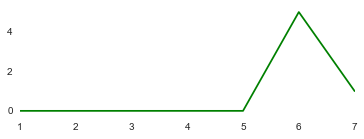

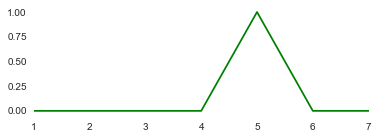

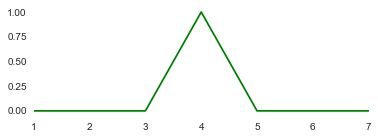

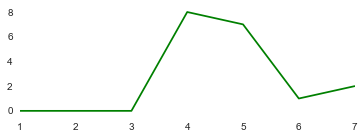

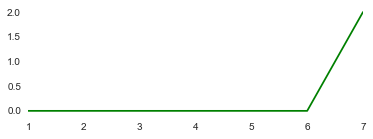

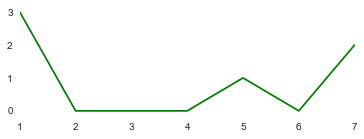

In [31]:
# So let's plot ALL THE SPELLS
# SIZE IN PIXELS: 470 -168
sns.set_style("white")
for spell in spells_df.spell.unique():
    fig, ax = plt.subplots(figsize=(6,2))
    results_spells[spell].plot(ax=ax,color='green')
    sns.despine(left=True,bottom=True,trim=True)
    plt.savefig((r"C:\Users\Avell\Desktop\the-lede-program\data-studio\harry-potter-spells\visuals\spells-lines\\" + spell + '-count.svg'), transparent=True)

    